In [ ]:
data=!unzip Datasets.zip -d path_to_directory

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Input,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=[224,224]
train_path = 'Datasets/Train'
valid_path = 'Datasets/test'

In [ ]:
resnet50=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False) # we are using IMAGENET weights 

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet50.layers:  #we are setting that no layer have to train , and donot update the weights
  layer.trainable=False

In [ ]:
folders=glob('/content/path_to_directory/Datasets/Train/*')
folders

['/content/path_to_directory/Datasets/Train/lamborghini',
 '/content/path_to_directory/Datasets/Train/audi',
 '/content/path_to_directory/Datasets/Train/mercedes']

In [ ]:
x=Flatten()(resnet50.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=resnet50.input,outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/path_to_directory/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/path_to_directory/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 14s 7s/step - loss: 4.3057 - accuracy: 0.3594 - val_loss: 3.1531 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 13s 7s/step - loss: 4.5529 - accuracy: 0.3438 - val_loss: 8.4802 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 13s 7s/step - loss: 6.1604 - accuracy: 0.3438 - val_loss: 3.6329 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 13s 7s/step - loss: 2.1836 - accuracy: 0.4375 - val_loss: 2.2922 - val_accuracy: 0.5690
Epoch 5/50
2/2 [==============================] - 13s 7s/step - loss: 3.9384 - accuracy: 0.4844 - val_loss: 2.7449 - val_accuracy: 0.4828
Epoch 6/50
2/2 [==============================] - 13s 7s/step - loss: 3.7641 - accuracy: 0.5312 - val_loss: 1.7048 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 13s 7s/step - loss: 1.1679 - accuracy: 0.6406 

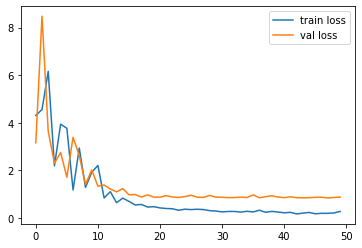

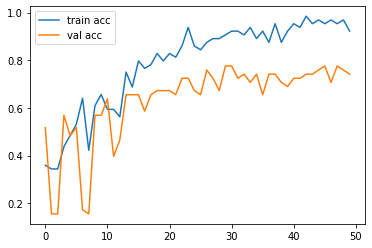

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.31895114e-02, 7.98437834e-01, 1.88372657e-01],
       [2.81759794e-03, 4.14507806e-01, 5.82674623e-01],
       [3.03560030e-03, 9.14951861e-01, 8.20126459e-02],
       [2.30248757e-02, 3.80252451e-01, 5.96722662e-01],
       [4.51158220e-03, 9.73951817e-01, 2.15366650e-02],
       [1.74234230e-02, 1.10549787e-02, 9.71521616e-01],
       [6.74542738e-03, 5.92889309e-01, 4.00365204e-01],
       [1.09297419e-02, 2.55478197e-03, 9.86515403e-01],
       [4.00295891e-02, 5.54896928e-02, 9.04480696e-01],
       [1.12239821e-02, 4.38737810e-01, 5.50038159e-01],
       [8.50802064e-01, 6.12925142e-02, 8.79053399e-02],
       [5.63640594e-01, 2.90286839e-01, 1.46072581e-01],
       [5.63329691e-03, 9.29470599e-01, 6.48960769e-02],
       [3.79489422e-01, 1.21392459e-02, 6.08371317e-01],
       [1.98875889e-02, 9.08031046e-01, 7.20813647e-02],
       [5.57463181e-06, 1.39405151e-04, 9.99855042e-01],
       [2.77362764e-02, 7.38423944e-01, 2.33839855e-01],
       [1.25148911e-02, 7.83078

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0])

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/path_to_directory/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)


In [ ]:
x=x/255

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.04039198, 0.003213  , 0.95639503]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([2])